In [1]:
from RanDepict import RandomDepictor
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
with open("time_report.txt", "r") as time_data:
    time_data = [line[:-1].split('\t') 
                 for line in time_data.readlines()]
    time_data = [[float(num) for num in arr if num != ''] 
                 for arr in time_data]
    time_data = np.array(time_data)
number = time_data[:, 0]

FP_noaug = [time/60 for time in time_data[:, 1]]
slope, intercept, r_value, p_value, std_err = stats.linregress(number, FP_noaug)
FP_noaug_regr = [intercept+slope*x for x in number]
print(f'FP no aug: {intercept} + {slope} * image_number;  R_square = {r_value}')
print(f'FP no aug: Extrapolated time needed for 1 million images: {(intercept+slope*1000000)/60} hours')

FP_aug = [time/60 for time in time_data[:, 2]]
slope, intercept, r_value, p_value, std_err = stats.linregress(number, FP_aug)
FP_aug_regr = [intercept+slope*x for x in number]
print(f'FP aug: {intercept} + {slope} * image_number;  R_square = {r_value}')
print(f'FP aug: Extrapolated time needed for 1 million images: {(intercept+slope*1000000)/60} hours')

norm_noaug = [time/60 for time in time_data[:, 3]]
slope, intercept, r_value, p_value, std_err = stats.linregress(number, norm_noaug)
norm_noaug_regr = [intercept+slope*x for x in number]
print(f'norm no aug: {intercept} + {slope} * image_number;  R_square = {r_value}')
print(f'norm no aug: Extrapolated time needed for 1 million images: {(intercept+slope*1000000)/60} hours')

norm_aug = [time/60 for time in time_data[:, 4]]
slope, intercept, r_value, p_value, std_err = stats.linregress(number, norm_aug)
norm_aug_regr = [intercept+slope*x for x in number]
print(f'norm no aug: {intercept} + {slope} * image_number;  R_square = {r_value}')
print(f'norm aug: Extrapolated time needed for 1 million images: {(intercept+slope*1000000)/60} hours')





FP no aug: 0.6452900407643174 + 0.007606010695255354 * image_number;  R_square = 0.9994004475268919
FP no aug: Extrapolated time needed for 1 million images: 126.77759975493531 hours
FP aug: 1.7022227715030045 + 0.0082676068987588 * image_number;  R_square = 0.9967830787649802
FP aug: Extrapolated time needed for 1 million images: 137.82181869217172 hours
norm no aug: 0.0904645923910472 + 0.0011637281436857156 * image_number;  R_square = 0.9998843698602322
norm no aug: Extrapolated time needed for 1 million images: 19.396976804635113 hours
norm no aug: 0.08833082121907543 + 0.0018513435888665147 * image_number;  R_square = 0.999405814748415
norm aug: Extrapolated time needed for 1 million images: 30.85719866146223 hours


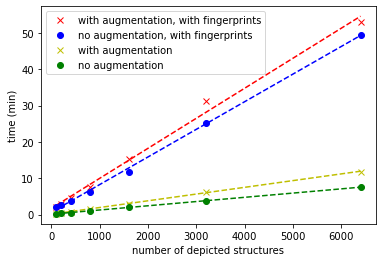

In [3]:
plt.plot(number, FP_aug, "rx",label = "with augmentation, with fingerprints")
plt.plot(number, FP_aug_regr, "r--")

plt.plot(number, FP_noaug, "bo",label = "no augmentation, with fingerprints")
plt.plot(number, FP_noaug_regr, "b--")

plt.plot(number, norm_aug, "yx",label = "with augmentation")
plt.plot(number, norm_aug_regr, "y--")

plt.plot(number, norm_noaug, "go",label = "no augmentation")
plt.plot(number, norm_noaug_regr, "g--")

plt.xlabel("number of depicted structures")
plt.ylabel("time (min)")
plt.legend()
plt.savefig('runtime_analysis.png', dpi=300)

plt.show()
